In [1]:
import argparse
import numpy as np
import sys
import time
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.layers import (
        Input,
        InputLayer,
        Flatten,
        Activation,
        Dense)
from tensorflow.keras.layers import (
        Conv2D,
        MaxPooling2D)
from tensorflow.keras.activations import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import vgg16
import tensorflow.keras.backend as K

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '6'

In [3]:
image_path = 'husky.jpg'
layer_name = 'block5_conv3'
feature_to_visualize = 0
visualize_mode = 'max' ### max or all

In [4]:
model = vgg16.VGG16(weights = 'imagenet', include_top = True)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

In [5]:
layer_dict = {layer.name:layer for layer in model.layers}
if not layer_name in layer_dict:
    print('Wrong layer name')

In [6]:
img = Image.open(image_path)
img = img.resize((224, 224))
img_array = np.array(img)
# img_array = np.transpose(img_array, (2, 0, 1))
# original code based on image type as 'channel first'
img_array = img_array[np.newaxis, :]
img_array = img_array.astype(np.float)
img_array = vgg16.preprocess_input(img_array)
img_array.shape

(1, 224, 224, 3)

In [17]:
deconv_origin = visualize(model, img_array, 
        layer_name, feature_to_visualize, visualize_mode)

In [33]:
deconv_origin = visualize(model, img_array, 
        layer_name, label_table['Siberian_husky'], 'all')

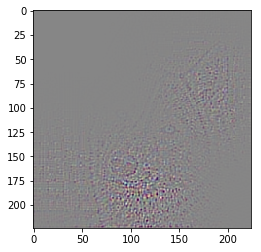

In [34]:
deconv = deconv_origin - deconv_origin.min()
deconv *= 1.0 / (deconv.max() + 1e-8)
deconv = deconv[:, :, ::-1]
uint8_deconv = (deconv * 255).astype(np.uint8)
plt.figure()
plt.imshow(uint8_deconv)

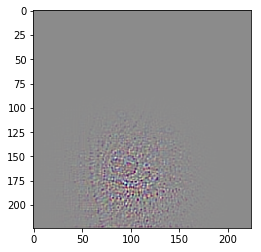

In [35]:
deconv_origin = visualize(model, img_array, 
        layer_name, label_table['Siberian_husky'], 'max')
deconv = deconv_origin - deconv_origin.min()
deconv *= 1.0 / (deconv.max() + 1e-8)
deconv = deconv[:, :, ::-1]
uint8_deconv = (deconv * 255).astype(np.uint8)
plt.figure()
plt.imshow(uint8_deconv)

In [ ]:
img = Image.fromarray(uint8_deconv, 'RGB')
img.save('results/{}_{}_{}.png'.format(layer_name, feature_to_visualize, visualize_mode))

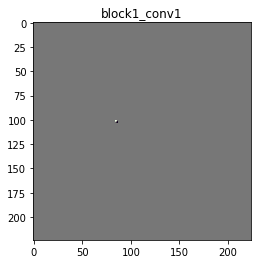

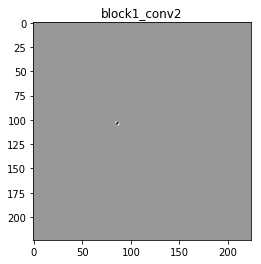

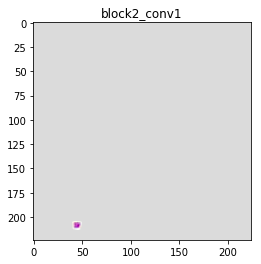

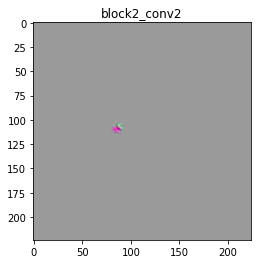

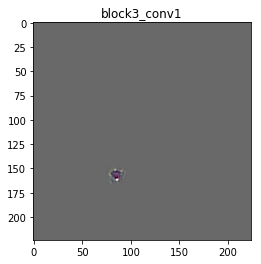

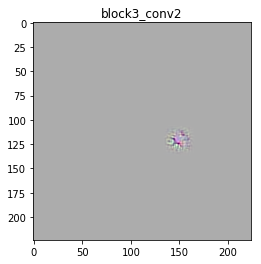

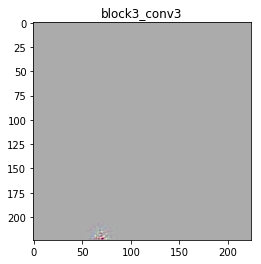

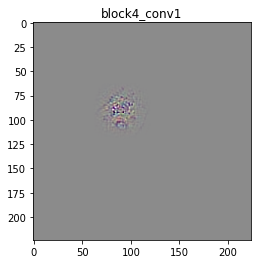

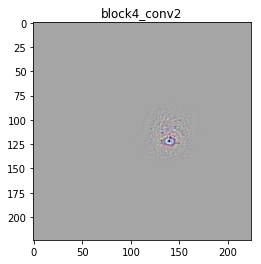

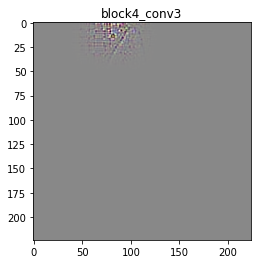

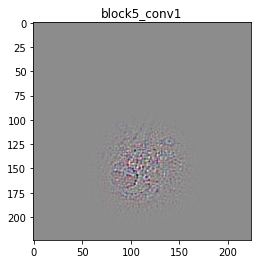

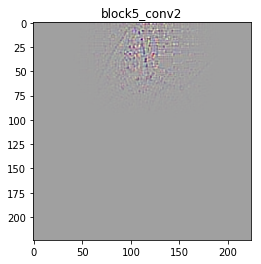

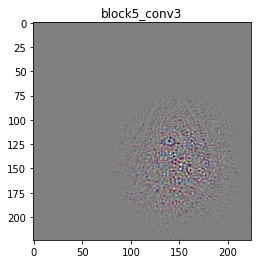

In [19]:
conv_list = [layer for layer in model.layers if isinstance(layer, Conv2D)]

for layer in conv_list:
    deconv_origin = visualize(model, img_array, 
        layer.name, feature_to_visualize, 'max')
    deconv = deconv_origin - deconv_origin.min()
    deconv *= 1.0 / (deconv.max() + 1e-8)    
    deconv = deconv[:, :, ::-1]
    uint8_deconv = (deconv * 255).astype(np.uint8)
    plt.figure()
    plt.title(layer.name)
    plt.imshow(uint8_deconv)

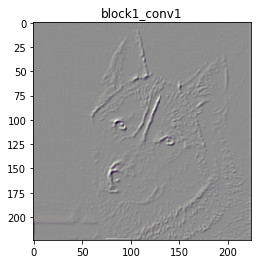

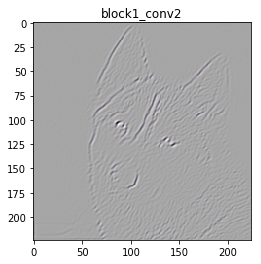

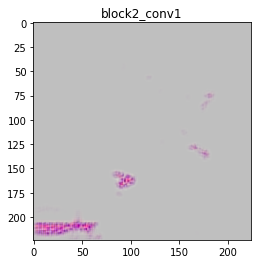

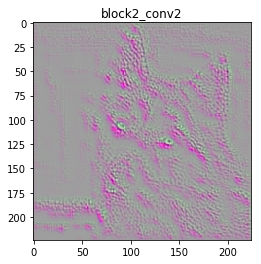

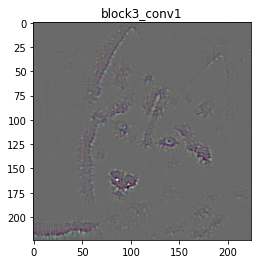

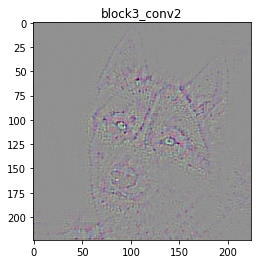

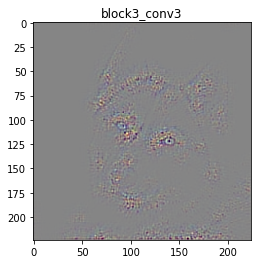

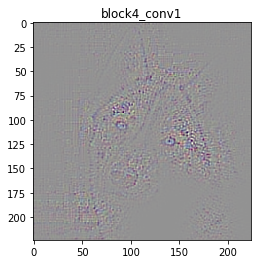

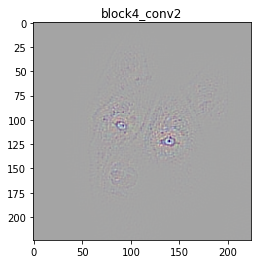

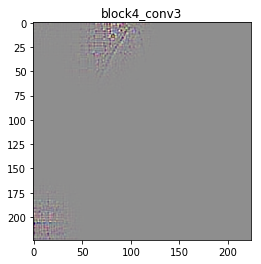

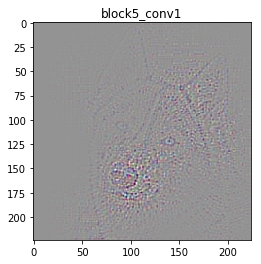

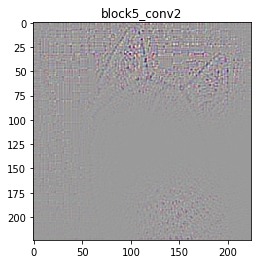

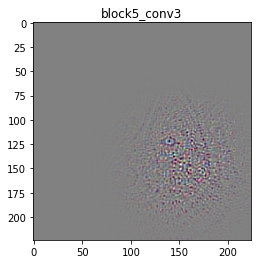

In [20]:
conv_list = [layer for layer in model.layers if isinstance(layer, Conv2D)]

for layer in conv_list:
    deconv_origin = visualize(model, img_array, 
        layer.name, feature_to_visualize, 'all')
    deconv = deconv_origin - deconv_origin.min()
    deconv *= 1.0 / (deconv.max() + 1e-8)
    deconv = deconv[:, :, ::-1]
    uint8_deconv = (deconv * 255).astype(np.uint8)
    plt.figure()
    plt.title(layer.name)
    plt.imshow(uint8_deconv)

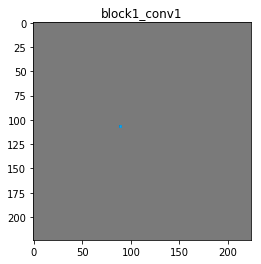

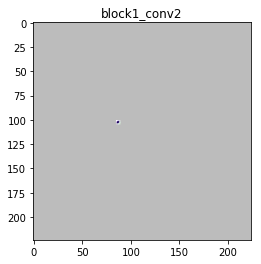

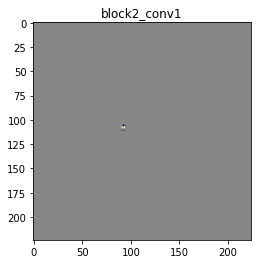

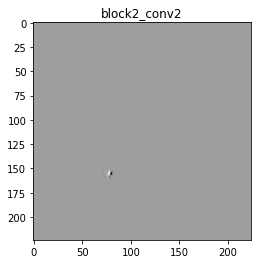

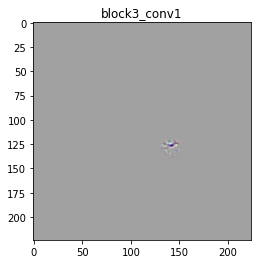

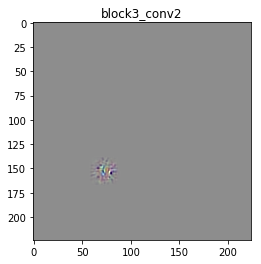

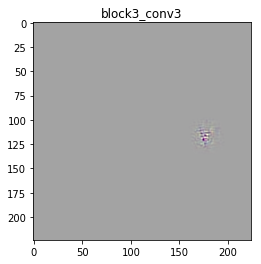

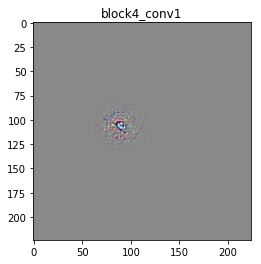

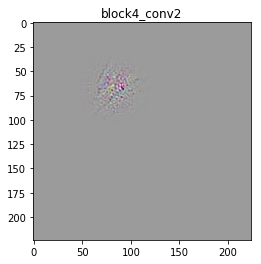

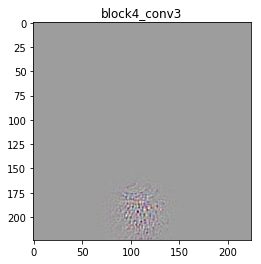

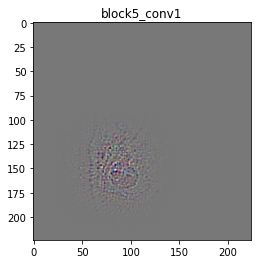

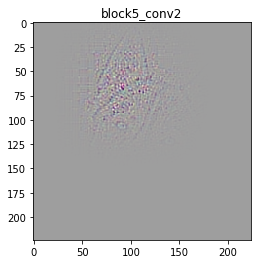

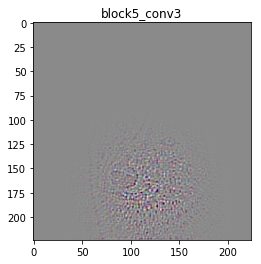

In [21]:
conv_list = [layer for layer in model.layers if isinstance(layer, Conv2D)]

for layer in conv_list:
    deconv_origin = visualize(model, img_array, 
        layer.name, 1, 'max')
    deconv = deconv_origin - deconv_origin.min()
    deconv *= 1.0 / (deconv.max() + 1e-8)
    deconv = deconv[:, :, ::-1]
    uint8_deconv = (deconv * 255).astype(np.uint8)
    plt.figure()
    plt.title(layer.name)
    plt.imshow(uint8_deconv)

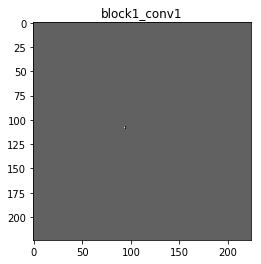

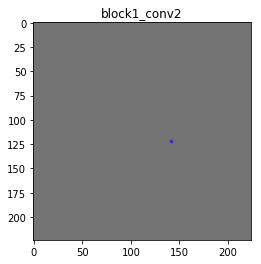

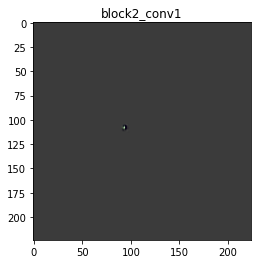

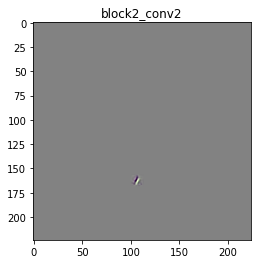

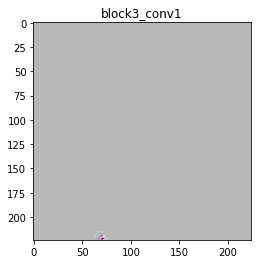

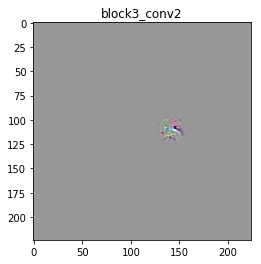

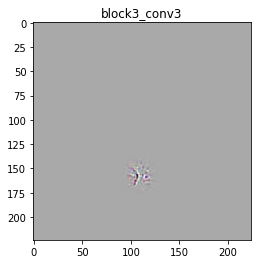

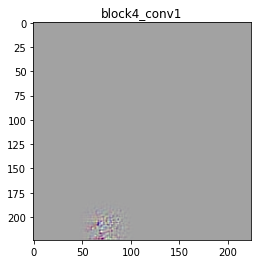

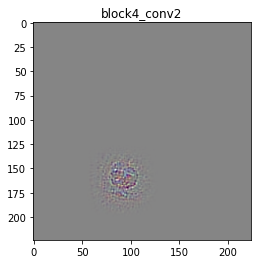

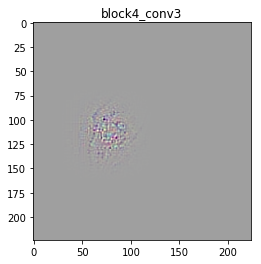

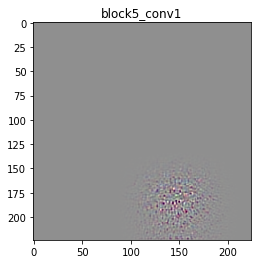

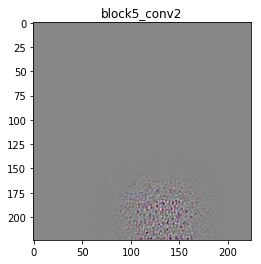

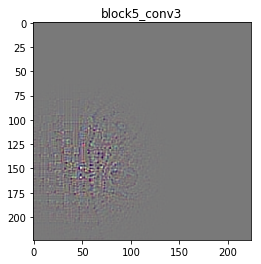

In [22]:
conv_list = [layer for layer in model.layers if isinstance(layer, Conv2D)]

for layer in conv_list:
    deconv_origin = visualize(model, img_array, 
        layer.name, 2, 'max')
    deconv = deconv_origin - deconv_origin.min()
    deconv *= 1.0 / (deconv.max() + 1e-8)
    deconv = deconv[:, :, ::-1]
    uint8_deconv = (deconv * 255).astype(np.uint8)
    plt.figure()
    plt.title(layer.name)
    plt.imshow(uint8_deconv)

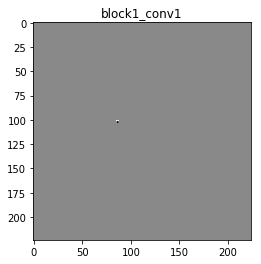

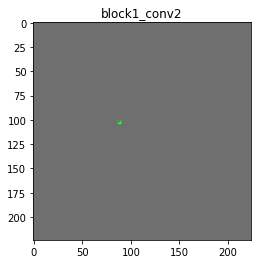

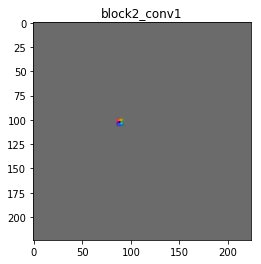

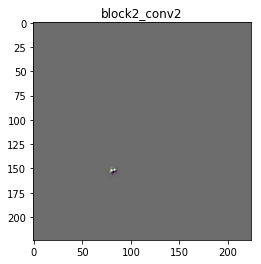

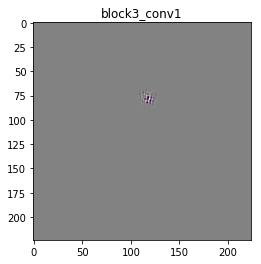

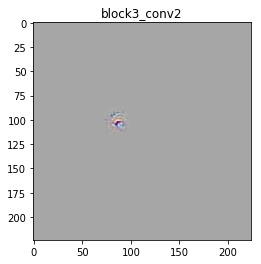

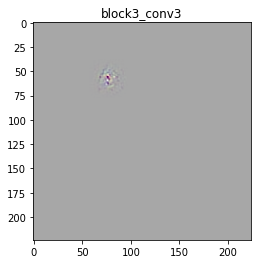

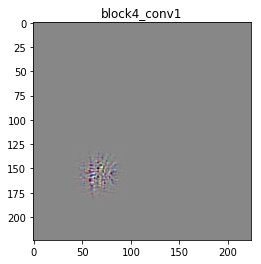

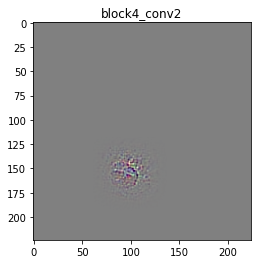

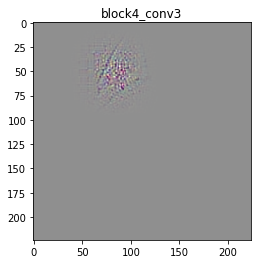

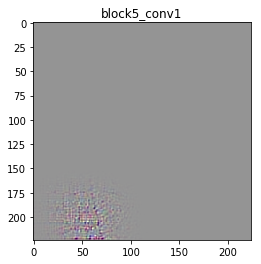

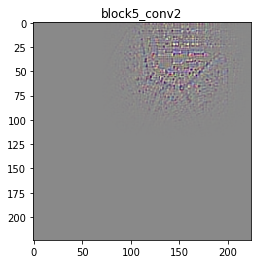

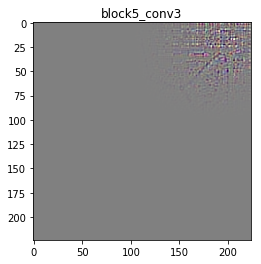

In [23]:
conv_list = [layer for layer in model.layers if isinstance(layer, Conv2D)]

for layer in conv_list:
    deconv_origin = visualize(model, img_array, 
        layer.name, 3, 'max')
    deconv = deconv_origin - deconv_origin.min()
    deconv *= 1.0 / (deconv.max() + 1e-8)
    deconv = deconv[:, :, ::-1]
    uint8_deconv = (deconv * 255).astype(np.uint8)
    plt.figure()
    plt.title(layer.name)
    plt.imshow(uint8_deconv)

In [11]:
label_list = vgg16.decode_predictions(np.array([np.zeros(1000)]), top=1000)[0]
label_list = sorted(label_list)
label_list = [label for _,label,_ in label_list]
label_table = {label:i for i, label in enumerate(label_list)}
label_list

['tench',
 'goldfish',
 'great_white_shark',
 'tiger_shark',
 'hammerhead',
 'electric_ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house_finch',
 'junco',
 'indigo_bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water_ouzel',
 'kite',
 'bald_eagle',
 'vulture',
 'great_grey_owl',
 'European_fire_salamander',
 'common_newt',
 'eft',
 'spotted_salamander',
 'axolotl',
 'bullfrog',
 'tree_frog',
 'tailed_frog',
 'loggerhead',
 'leatherback_turtle',
 'mud_turtle',
 'terrapin',
 'box_turtle',
 'banded_gecko',
 'common_iguana',
 'American_chameleon',
 'whiptail',
 'agama',
 'frilled_lizard',
 'alligator_lizard',
 'Gila_monster',
 'green_lizard',
 'African_chameleon',
 'Komodo_dragon',
 'African_crocodile',
 'American_alligator',
 'triceratops',
 'thunder_snake',
 'ringneck_snake',
 'hognose_snake',
 'green_snake',
 'king_snake',
 'garter_snake',
 'water_snake',
 'vine_snake',
 'night_snake',
 'boa_constrictor',
 'rock_python',
 'Indian_cobr

=== stop ===
(None, 25088) (None, 4096)
=== stop ===
=== stop ===
(None, 25088) (None, 4096)
=== stop ===
=== stop ===
(None, 4096) (None, 4096)
=== stop ===
=== stop ===
(None, 25088) (None, 4096)
=== stop ===


InternalError: Dst tensor is not initialized.
	 [[{{node _arg_Placeholder_2786_0_0}}]]

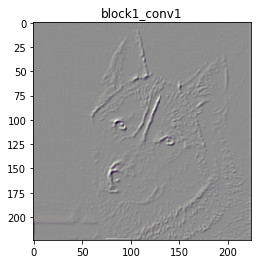

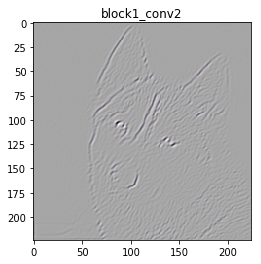

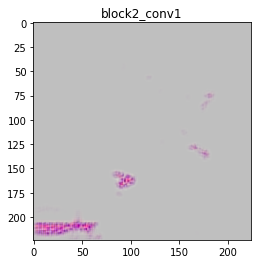

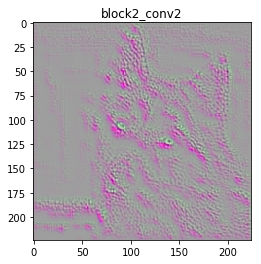

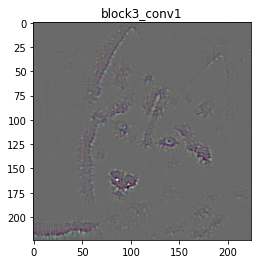

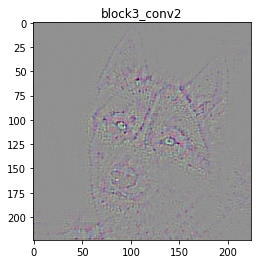

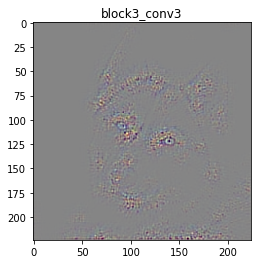

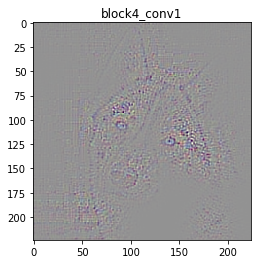

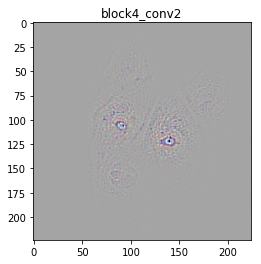

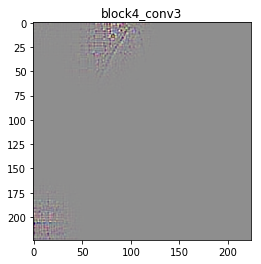

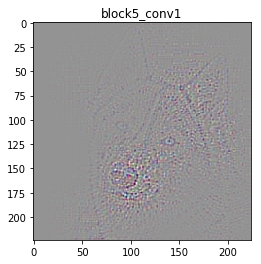

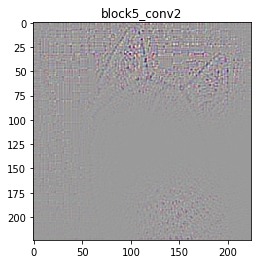

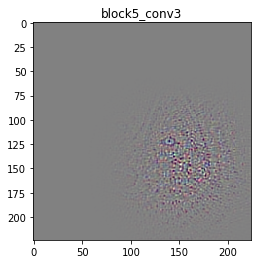

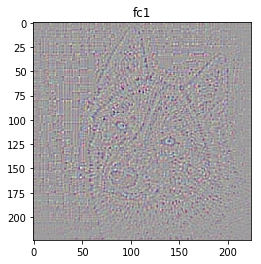

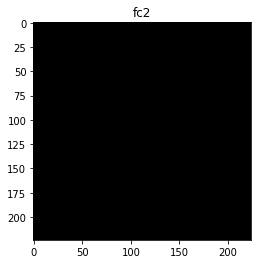

In [40]:
output_base = 'from_professor/visualization/2D/VGG_16/Deconvnet/'
os.makedirs(output_base, exist_ok=True)

layer_idx = 0

conv_list = [layer for layer in model.layers if isinstance(layer, Conv2D)]
dense_list = [layer for layer in model.layers if isinstance(layer, Dense)][:-1]
output_layer = [layer for layer in model.layers if isinstance(layer, Dense)][-1]

for layer in conv_list+dense_list:
    deconv_origin = visualize(model, img_array, 
                              layer.name, layer_idx, 'all')
    deconv = deconv_origin - deconv_origin.min()
    deconv *= 1.0 / (deconv.max() + 1e-8)
    deconv = deconv[:, :, ::-1]
    uint8_deconv = (deconv * 255).astype(np.uint8)
    plt.figure()
    plt.title(layer.name)
    plt.imsave(os.path.join(output_base, 
                            'all_{}_layer_{}_filter'.format(layer.name, layer_idx)), uint8_deconv)
    plt.imshow(uint8_deconv)
    
deconv_origin = visualize(model, img_array, 
                          output_layer.name, label_table['Siberian_husky'], 'max')
deconv = deconv_origin - deconv_origin.min()
deconv *= 1.0 / (deconv.max() + 1e-8)
deconv = deconv[:, :, ::-1]
uint8_deconv = (deconv * 255).astype(np.uint8)
plt.figure()
plt.title(output_layer.name)
plt.imsave(os.path.join(output_base, 
                        'all_{}_layer_{}_husky'.format(output_layer.name, label_table['Siberian_husky'])), uint8_deconv)
plt.imshow(uint8_deconv)

InternalError: Dst tensor is not initialized.
	 [[{{node _arg_Placeholder_3115_0_0}}]]

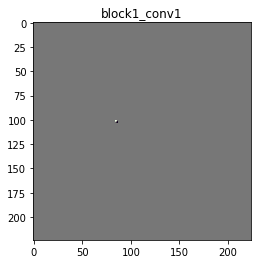

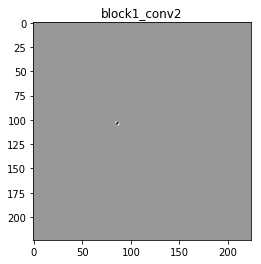

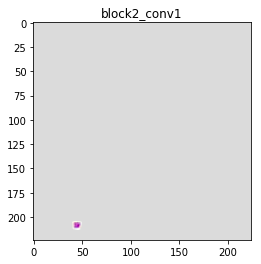

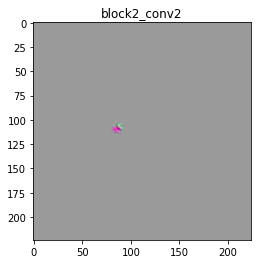

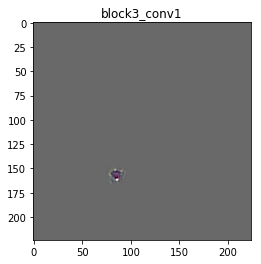

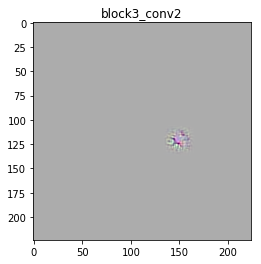

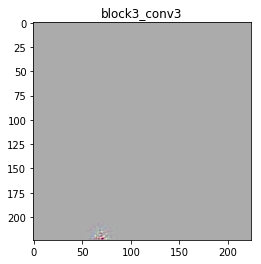

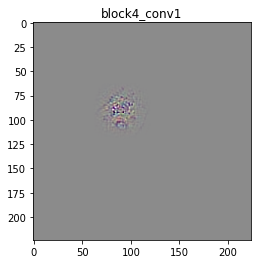

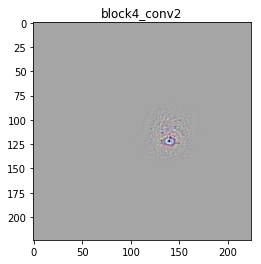

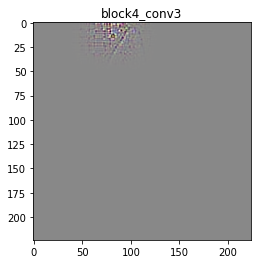

In [41]:
output_base = 'from_professor/visualization/2D/VGG_16/Deconvnet/'
os.makedirs(output_base, exist_ok=True)

layer_idx = 0

conv_list = [layer for layer in model.layers if isinstance(layer, Conv2D)]
dense_list = [layer for layer in model.layers if isinstance(layer, Dense)][:-1]
output_layer = [layer for layer in model.layers if isinstance(layer, Dense)][-1]

for layer in conv_list+dense_list:
    deconv_origin = visualize(model, img_array, 
                              layer.name, layer_idx, 'max')
    deconv = deconv_origin - deconv_origin.min()
    deconv *= 1.0 / (deconv.max() + 1e-8)
    deconv = deconv[:, :, ::-1]
    uint8_deconv = (deconv * 255).astype(np.uint8)
    plt.figure()
    plt.title(layer.name)
    plt.imsave(os.path.join(output_base, 
                            'max_{}_layer_{}_filter'.format(layer.name, layer_idx)), uint8_deconv)
    plt.imshow(uint8_deconv)
    
deconv_origin = visualize(model, img_array, 
                          output_layer.name, label_table['Siberian_husky'], 'max')
deconv = deconv_origin - deconv_origin.min()
deconv *= 1.0 / (deconv.max() + 1e-8)
deconv = deconv[:, :, ::-1]
uint8_deconv = (deconv * 255).astype(np.uint8)
plt.figure()
plt.title(output_layer.name)
plt.imsave(os.path.join(output_base, 
                        'max_{}_layer_{}_husky'.format(output_layer.name, label_table['Siberian_husky'])), uint8_deconv)
plt.imshow(uint8_deconv)

In [14]:
class DConv2D(object):
    '''
    A class to define forward and backward operation on Conv2D
    '''
    def __init__(self, layer):
        '''
        # Arguments
            layer: an instance of Conv2D layer, whose configuration 
                   will be used to initiate DConv2D(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer

        weights = layer.get_weights()
        W = weights[0]
        b = weights[1]

        # Set up_func for DConv2D
        nb_up_filter = W.shape[3]
        nb_up_row = W.shape[1]
        nb_up_col = W.shape[0]
        input_ = Input(shape = layer.input_shape[1:])
        output_conv = Conv2D(
                    filters = nb_up_filter, 
                    kernel_size = (nb_up_row, nb_up_col), 
                    strides=(1, 1), 
                    padding='same'
        )
        output = output_conv(input_)
        output_conv.set_weights([W,b])
        
        self.up_func = K.function([input_, K.learning_phase()], output)

        # Flip W horizontally and vertically, 
        # and set down_func for DConvolution2D
        W = np.transpose(W, (0, 1, 3, 2))
        W = W[::-1, ::-1, :, :]
        nb_down_filter = W.shape[3]
        nb_down_row = W.shape[1]
        nb_down_col = W.shape[0]
        b = np.zeros(nb_down_filter)
        input_ = Input(shape = layer.output_shape[1:])
        output_conv = Conv2D(
                    filters = nb_down_filter, 
                    kernel_size = (nb_down_row, nb_down_col), 
                    strides=(1, 1), 
                    padding='same'
        )
        output = output_conv(input_)
        output_conv.set_weights([W,b])
        self.down_func = K.function([input_, K.learning_phase()], output)

    def up(self, data, learning_phase = 0):
        '''
        function to compute Convolution output in forward pass
        # Arguments
            data: Data to be operated in forward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            Convolved result
        '''
        self.up_data = self.up_func([data, learning_phase])
        return self.up_data

    def down(self, data, learning_phase = 0):
        '''
        function to compute Deconvolution output in backward pass
        # Arguments
            data: Data to be operated in backward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            Deconvolved result
        '''
        self.down_data= self.down_func([data, learning_phase])
        return self.down_data

In [ ]:
class DDense(object):
    '''
    A class to define forward and backward operation on Dense
    '''
    def __init__(self, layer):
        '''
        # Arguments
            layer: an instance of Dense layer, whose configuration 
                   will be used to initiate DDense(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer
        weights = layer.get_weights()
        W = weights[0]
        b = weights[1]
        
        #Set up_func for DDense
        input_ = Input(shape = layer.input_shape[1:])
        output_dense = Dense(units = layer.output_shape[1])
        output = output_dense(input_)
        output_dense.set_weights([W, b])
        self.up_func = K.function([input_, K.learning_phase()], output)
        
        #Transpose W and set down_func for DDense
        W = W.transpose()
        self.input_shape = layer.input_shape
        self.output_shape = layer.output_shape
        b = np.zeros(self.input_shape[1])
        input_ = Input(shape = self.output_shape[1:])
        output_dense = Dense(
                units = self.input_shape[1])
        output = output_dense(input_)
        output_dense.set_weights([W, b])
        self.down_func = K.function([input_, K.learning_phase()], output)
    

    def up(self, data, learning_phase = 0):
        '''
        function to compute dense output in forward pass
        # Arguments
            data: Data to be operated in forward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            Result of dense layer
        '''
        self.up_data = self.up_func([data, learning_phase])
        return self.up_data
        
    def down(self, data, learning_phase = 0):
        '''
        function to compute dense output in backward pass
        # Arguments
            data: Data to be operated in forward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            Result of reverse dense layer
        '''
        # data = data - self.bias
        self.down_data = self.down_func([data, learning_phase])
        return self.down_data

In [3]:
class DPooling(object):
    '''
    A class to define forward and backward operation on Pooling
    '''
    def __init__(self, layer):
        '''
        # Arguments
            layer: an instance of Pooling layer, whose configuration 
                   will be used to initiate DPooling(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer
        self.poolsize = layer.pool_size
    
    def up(self, data, learning_phase = 0):
        '''
        function to compute pooling output in forward pass
        # Arguments
            data: Data to be operated in forward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            Pooled result
        '''
        [self.up_data, self.switch] = \
                self.__max_pooling_with_switch(data, self.poolsize)
        return self.up_data

    def down(self, data, learning_phase = 0):
        '''
        function to compute unpooling output in backward pass
        # Arguments
            data: Data to be operated in forward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            Unpooled result
        '''
        self.down_data = self.__max_unpooling_with_switch(data, self.switch)
        return self.down_data
    
    def __max_pooling_with_switch(self, input_, poolsize):
        '''
        Compute pooling output and switch in forward pass, switch stores 
        location of the maximum value in each poolsize * poolsize block
        # Arguments
            input: data to be pooled
            poolsize: size of pooling operation
        # Returns
            Pooled result and Switch
        '''
        switch = np.zeros(input_.shape)
        out_shape = list(input_.shape)
        row_poolsize = int(poolsize[0])
        col_poolsize = int(poolsize[1])
        out_shape[1] = out_shape[1] // poolsize[0]
        out_shape[2] = out_shape[2] // poolsize[1]
        
        pooled = np.zeros(out_shape)
        
        for sample in range(input_.shape[0]):
            for dim in range(input_.shape[3]):
                for row in range(out_shape[1]):
                    for col in range(out_shape[2]):
                        patch = input_[sample, 
                                row * row_poolsize : (row + 1) * row_poolsize,
                                col * col_poolsize : (col + 1) * col_poolsize,
                                dim]
                        max_value = patch.max()
                        pooled[sample, row, colb, dim] = max_value
                        max_col_index = patch.argmax(axis = 1)
                        max_cols = patch.max(axis = 1)
                        max_row = max_cols.argmax()
                        max_col = max_col_index[max_row]
                        switch[sample, 
                                row * row_poolsize + max_row, 
                                col * col_poolsize + max_col,
                                dim] = 1
        return [pooled, switch]
    
    # Compute unpooled output using pooled data and switch
    def __max_unpooling_with_switch(self, input_, switch):
        '''
        Compute unpooled output using pooled data and switch
        # Arguments
            input: data to be pooled
            poolsize: size of pooling operation
            switch: switch storing location of each elements
        # Returns
            Unpooled result
        '''
        tile = np.ones((switch.shape[1] // input_.shape[1], 
            switch.shape[2] // input_.shape[2]))
        tile = tile[np.newaxis,:,:,np.newaxis]
        out = np.kron(input_, tile)
        out = cv2.resize(out.squeeze(), dsize=(switch.shape[1], switch.shape[2]), 
                              interpolation=cv2.INTER_CUBIC)
        unpooled = out * switch
        return unpooled

In [17]:
class DActivation(object):
    '''
    A class to define forward and backward operation on Activation
    '''
    def __init__(self, layer, linear = False):
        '''
        # Arguments
            layer: an instance of Activation layer, whose configuration 
                   will be used to initiate DActivation(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer
        self.linear = linear
        self.activation = layer.activation
        input_ = K.placeholder(shape = layer.output_shape)

        output = self.activation(input_)
        # According to the original paper, 
        # In forward pass and backward pass, do the same activation(relu)
        self.up_func = K.function(
                [input_, K.learning_phase()], output)
        self.down_func = K.function(
                [input_, K.learning_phase()], output)

    # Compute activation in forward pass
    def up(self, data, learning_phase = 0):
        '''
        function to compute activation in forward pass
        # Arguments
            data: Data to be operated in forward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            Activation
        '''
        self.up_data = self.up_func([data, learning_phase])
        return self.up_data

    # Compute activation in backward pass
    def down(self, data, learning_phase = 0):
        '''
        function to compute activation in backward pass
        # Arguments
            data: Data to be operated in backward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            Activation
        '''
        self.down_data = self.down_func([data, learning_phase])
        return self.down_data

In [18]:
class DFlatten(object):
    '''
    A class to define forward and backward operation on Flatten
    '''
    def __init__(self, layer):
        '''
        # Arguments
            layer: an instance of Flatten layer, whose configuration 
                   will be used to initiate DFlatten(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer
        self.shape = layer.input_shape[1:]
        self.up_func = K.function(
                [layer.input, K.learning_phase()], layer.output)

    # Flatten 2D input into 1D output
    def up(self, data, learning_phase = 0):
        '''
        function to flatten input in forward pass
        # Arguments
            data: Data to be operated in forward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            Flattened data
        '''
        self.up_data = self.up_func([data, learning_phase])
        return self.up_data

    # Reshape 1D input into 2D output
    def down(self, data, learning_phase = 0):
        '''
        function to unflatten input in backward pass
        # Arguments
            data: Data to be operated in backward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            Recovered data
        '''
        new_shape = [data.shape[0]] + list(self.shape)
        assert np.prod(self.shape) == np.prod(data.shape[1:])
        self.down_data = np.reshape(data, new_shape)
        return self.down_data

In [19]:
class DInput(object):
    '''
    A class to define forward and backward operation on Input
    '''
    def __init__(self, layer):
        '''
        # Arguments
            layer: an instance of Input layer, whose configuration 
                   will be used to initiate DInput(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer
    
    # input and output of Inputl layer are the same
    def up(self, data, learning_phase = 0):
        '''
        function to operate input in forward pass, the input and output
        are the same
        # Arguments
            data: Data to be operated in forward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            data
        '''
        self.up_data = data
        return self.up_data
    
    def down(self, data, learning_phase = 0):
        '''
        function to operate input in backward pass, the input and output
        are the same
        # Arguments
            data: Data to be operated in backward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            data
        '''
        self.down_data = data
        return self.down_data

In [20]:
def visualize(model, data, layer_name, feature_to_visualize, visualize_mode):
    '''
    function to visualize feature
    # Arguments
        model: Pre-trained model used to visualize data
        data: image to visualize
        layer_name: Name of layer to visualize
        feature_to_visualize: Featuren to visualize
        visualize_mode: Visualize mode, 'all' or 'max', 'max' will only pick 
                        the greates activation in a feature map and set others
                        to 0s, this will indicate which part fire the neuron 
                        most; 'all' will use all values in a feature map,
                        which will show what image the filter sees. For 
                        convolutional layers, There is difference between 
                        'all' and 'max', for Dense layer, they are the same
    # Returns
        The image reflecting feature
    '''
    deconv_layers = []
    # Stack layers
    for i in range(len(model.layers)):
        if isinstance(model.layers[i], Conv2D):
            deconv_layers.append(DConv2D(model.layers[i]))
            deconv_layers.append(
                    DActivation(model.layers[i]))
        elif isinstance(model.layers[i], MaxPooling2D):
            deconv_layers.append(DPooling(model.layers[i]))
        elif isinstance(model.layers[i], Dense):
            deconv_layers.append(DDense(model.layers[i]))
            deconv_layers.append(
                    DActivation(model.layers[i]))
        elif isinstance(model.layers[i], Activation):
            deconv_layers.append(DActivation(model.alyers[i]))
        elif isinstance(model.layers[i], Flatten):
            deconv_layers.append(DFlatten(model.layers[i]))
        elif isinstance(model.layers[i], InputLayer):
            deconv_layers.append(DInput(model.layers[i]))
        else:
            print('Cannot handle this type of layer')
            print(model.layers[i].get_config())
            sys.exit()
        if layer_name == model.layers[i].name:
            break

    # Forward pass
    deconv_layers[0].up(data)
    for i in range(1, len(deconv_layers)):
        deconv_layers[i].up(deconv_layers[i - 1].up_data)

    output = deconv_layers[-1].up_data
    assert output.ndim == 2 or output.ndim == 4
    if output.ndim == 2:
        feature_map = output[:, feature_to_visualize]
    else:
        feature_map = output[:, :, :, feature_to_visualize]
    if 'max' == visualize_mode:
        max_activation = feature_map.max()
        temp = feature_map == max_activation
        feature_map = feature_map * temp
    elif 'all' != visualize_mode:
        print('Illegal visualize mode')
        sys.exit()
    output = np.zeros_like(output)
    if 2 == output.ndim:
        output[:, feature_to_visualize] = feature_map
    else:
        output[:, :, :, feature_to_visualize] = feature_map

    # Backward pass
    deconv_layers[-1].down(output)
    for i in range(len(deconv_layers) - 2, -1, -1):
        deconv_layers[i].down(deconv_layers[i + 1].down_data)
    deconv = deconv_layers[0].down_data
    deconv = deconv.squeeze()
    
    return deconv